In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb9d2237b6ae29027e3e0f77f22c151


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ghanzi
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | valenza
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | xining
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | puerto suarez
Processing Record 20 of Set 1 | repatriacion
Processing Record 21 of Set 1 | jacmel
Processing Record 22 of Set 1 | sept-iles


Processing Record 36 of Set 4 | amazar
Processing Record 37 of Set 4 | jalu
Processing Record 38 of Set 4 | ostrovnoy
Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | nouakchott
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | mendahara
City not found. Skipping...
Processing Record 44 of Set 4 | balykshi
Processing Record 45 of Set 4 | shiraz
Processing Record 46 of Set 4 | along
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 49 of Set 4 | lasa
Processing Record 50 of Set 4 | hermanus
Processing Record 1 of Set 5 | havre-saint-pierre
Processing Record 2 of Set 5 | khomeynishahr
City not found. Skipping...
Processing Record 3 of Set 5 | tostamaa
City not found. Skipping...
Processing Record 4 of Set 5 | poum
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | stykkisholmur
Pro

Processing Record 26 of Set 8 | ponta do sol
Processing Record 27 of Set 8 | vilhena
Processing Record 28 of Set 8 | faanui
Processing Record 29 of Set 8 | san ramon
Processing Record 30 of Set 8 | tiarei
Processing Record 31 of Set 8 | beirut
Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | juxtlahuaca
Processing Record 34 of Set 8 | yar-sale
Processing Record 35 of Set 8 | pemangkat
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | palmas bellas
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 8 | olafsvik
Processing Record 41 of Set 8 | warsaw
Processing Record 42 of Set 8 | kathu
Processing Record 43 of Set 8 | fianarantsoa
Processing Record 44 of Set 8 | bakersfield
Processing Record 45 of Set 8 | kristiansund
Processing Record 46 of Set 8 | uyuni
Processing Record 47 of Set 8 | katangli
Processing Record 48 of Set 8 | tawkar
City not found. Skippin

Processing Record 16 of Set 12 | minab
Processing Record 17 of Set 12 | ures
Processing Record 18 of Set 12 | luwuk
Processing Record 19 of Set 12 | rizhao
Processing Record 20 of Set 12 | grants
Processing Record 21 of Set 12 | salalah
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | pevek
Processing Record 24 of Set 12 | kulhudhuffushi
Processing Record 25 of Set 12 | alexander city
Processing Record 26 of Set 12 | kerki
City not found. Skipping...
Processing Record 27 of Set 12 | faridpur
Processing Record 28 of Set 12 | bargal
City not found. Skipping...
Processing Record 29 of Set 12 | leningradskiy
Processing Record 30 of Set 12 | kamaishi
Processing Record 31 of Set 12 | flin flon
Processing Record 32 of Set 12 | payo
Processing Record 33 of Set 12 | bustonkala
City not found. Skipping...
Processing Record 34 of Set 12 | jadu
Processing Record 35 of Set 12 | la tuque
Processing Record 36 of Set 12 | chulman
Processing Record 37 of Set 12 | galle
Proce

In [10]:
len(city_data)

593

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.6789,156.1250,39.69,91,100,25.28,RU,2021-04-14 20:08:52
1,Dikson,73.5069,80.5464,-18.00,100,100,3.91,RU,2021-04-14 20:08:52
2,Qaanaaq,77.4840,-69.3632,-7.69,81,0,1.70,GL,2021-04-14 20:08:53
3,Cockburn Town,21.4612,-71.1419,78.80,65,20,13.80,TC,2021-04-14 20:08:53
4,Rikitea,-23.1203,-134.9692,77.81,70,9,6.78,PF,2021-04-14 20:08:53
5,Ghanzi,-21.5667,21.7833,68.18,28,0,7.43,BW,2021-04-14 20:08:54
6,Mar Del Plata,-38.0023,-57.5575,73.40,56,20,8.05,AR,2021-04-14 20:07:26
7,Valenza,45.0141,8.6414,48.99,60,86,5.66,IT,2021-04-14 20:08:54
8,Kaitangata,-46.2817,169.8464,48.97,91,100,3.56,NZ,2021-04-14 20:08:54
9,Barrow,71.2906,-156.7887,12.20,79,90,11.50,US,2021-04-14 20:07:33


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-04-14 20:08:52,50.6789,156.1250,39.69,91,100,25.28
1,Dikson,RU,2021-04-14 20:08:52,73.5069,80.5464,-18.00,100,100,3.91
2,Qaanaaq,GL,2021-04-14 20:08:53,77.4840,-69.3632,-7.69,81,0,1.70
3,Cockburn Town,TC,2021-04-14 20:08:53,21.4612,-71.1419,78.80,65,20,13.80
4,Rikitea,PF,2021-04-14 20:08:53,-23.1203,-134.9692,77.81,70,9,6.78
...,...,...,...,...,...,...,...,...,...
588,Beloha,MG,2021-04-14 20:07:22,-25.1667,45.0500,73.53,88,2,8.81
589,Koumac,NC,2021-04-14 20:11:45,-20.5667,164.2833,76.06,88,73,5.32
590,Nguru,NG,2021-04-14 20:11:45,12.8791,10.4526,86.83,5,12,11.59
591,Fare,PF,2021-04-14 20:11:45,-16.7000,-151.0167,81.63,73,100,10.45


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

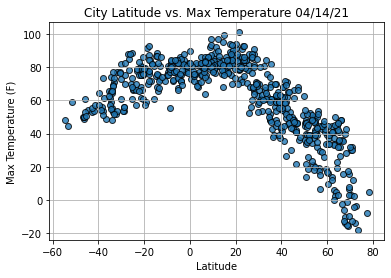

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

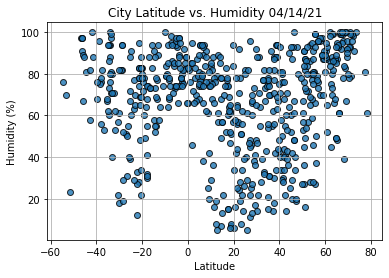

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

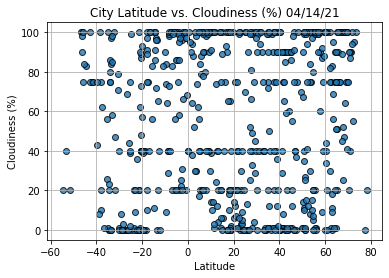

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

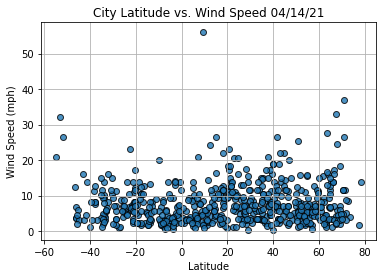

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-04-14 20:08:52,50.6789,156.1250,39.69,91,100,25.28
1,Dikson,RU,2021-04-14 20:08:52,73.5069,80.5464,-18.00,100,100,3.91
2,Qaanaaq,GL,2021-04-14 20:08:53,77.4840,-69.3632,-7.69,81,0,1.70
3,Cockburn Town,TC,2021-04-14 20:08:53,21.4612,-71.1419,78.80,65,20,13.80
4,Rikitea,PF,2021-04-14 20:08:53,-23.1203,-134.9692,77.81,70,9,6.78
...,...,...,...,...,...,...,...,...,...
588,Beloha,MG,2021-04-14 20:07:22,-25.1667,45.0500,73.53,88,2,8.81
589,Koumac,NC,2021-04-14 20:11:45,-20.5667,164.2833,76.06,88,73,5.32
590,Nguru,NG,2021-04-14 20:11:45,12.8791,10.4526,86.83,5,12,11.59
591,Fare,PF,2021-04-14 20:11:45,-16.7000,-151.0167,81.63,73,100,10.45


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                    Busselton
Country                        AU
Date          2021-04-14 20:08:56
Lat                        -33.65
Lng                      115.3333
Max Temp                    53.01
Humidity                       97
Cloudiness                     97
Wind Speed                   3.06
Name: 13, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
588    False
589    False
590     True
591    False
592     True
Name: Lat, Length: 593, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-04-14 20:08:52,50.6789,156.1250,39.69,91,100,25.28
1,Dikson,RU,2021-04-14 20:08:52,73.5069,80.5464,-18.00,100,100,3.91
2,Qaanaaq,GL,2021-04-14 20:08:53,77.4840,-69.3632,-7.69,81,0,1.70
3,Cockburn Town,TC,2021-04-14 20:08:53,21.4612,-71.1419,78.80,65,20,13.80
7,Valenza,IT,2021-04-14 20:08:54,45.0141,8.6414,48.99,60,86,5.66


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2021-04-14 20:08:52,50.6789,156.1250,39.69,91,100,25.28
1,Dikson,RU,2021-04-14 20:08:52,73.5069,80.5464,-18.00,100,100,3.91
2,Qaanaaq,GL,2021-04-14 20:08:53,77.4840,-69.3632,-7.69,81,0,1.70
3,Cockburn Town,TC,2021-04-14 20:08:53,21.4612,-71.1419,78.80,65,20,13.80
7,Valenza,IT,2021-04-14 20:08:54,45.0141,8.6414,48.99,60,86,5.66
...,...,...,...,...,...,...,...,...,...
585,Liverpool,GB,2021-04-14 20:07:37,53.4106,-2.9779,48.00,69,30,4.21
586,College,US,2021-04-14 20:11:44,64.8569,-147.8028,46.40,49,75,10.36
587,Kungurtug,RU,2021-04-14 20:11:44,50.5994,97.5228,21.63,84,100,2.75
590,Nguru,NG,2021-04-14 20:11:45,12.8791,10.4526,86.83,5,12,11.59


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Rikitea,PF,2021-04-14 20:08:53,-23.1203,-134.9692,77.81,70,9,6.78
5,Ghanzi,BW,2021-04-14 20:08:54,-21.5667,21.7833,68.18,28,0,7.43
6,Mar Del Plata,AR,2021-04-14 20:07:26,-38.0023,-57.5575,73.40,56,20,8.05
8,Kaitangata,NZ,2021-04-14 20:08:54,-46.2817,169.8464,48.97,91,100,3.56
11,Ushuaia,AR,2021-04-14 20:08:55,-54.8000,-68.3000,48.20,76,20,20.71
...,...,...,...,...,...,...,...,...,...
579,Quatre Cocos,MU,2021-04-14 20:11:42,-20.2078,57.7625,79.00,78,40,6.91
582,Port Pirie,AU,2021-04-14 20:11:43,-33.1833,138.0167,51.80,71,98,5.79
588,Beloha,MG,2021-04-14 20:07:22,-25.1667,45.0500,73.53,88,2,8.81
589,Koumac,NC,2021-04-14 20:11:45,-20.5667,164.2833,76.06,88,73,5.32


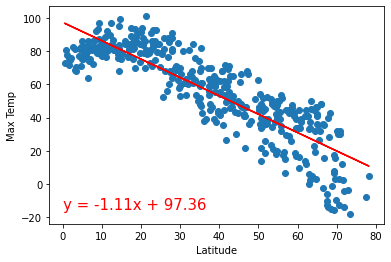

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

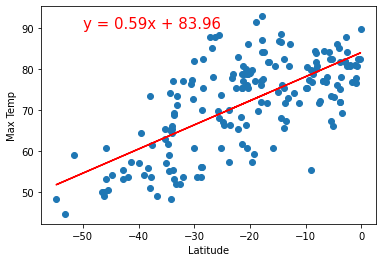

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

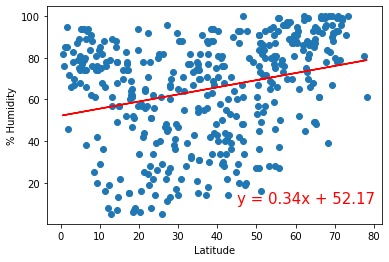

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

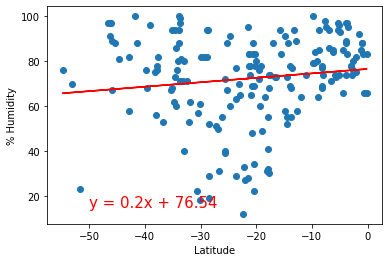

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

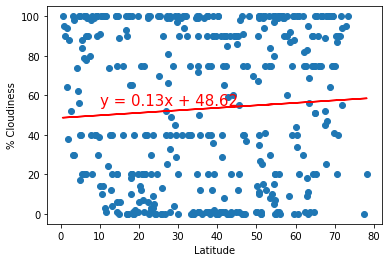

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

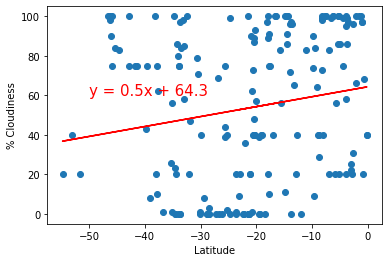

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

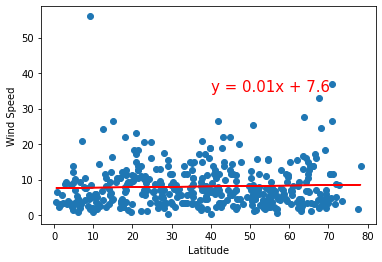

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

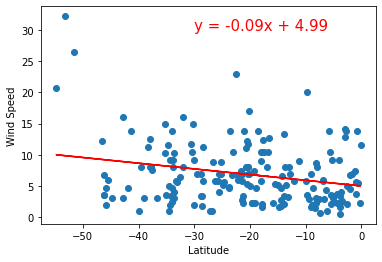

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [72]:
# # TROUBLE-SHOOTING MISSING TITLES
# 
# # Linear regression on the Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# # Call the function.
# plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 'Wind Speed',(-30,30))